## **09. Representasi Pengetahuan (Knowledge Representation)**

---


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
data_testing = pd.read_csv('sorted_topic_cluster_counts.csv')

In [82]:
#eda dari data_testing jumlah kosa kata dan kata terpanjang pada full_text
print(data_testing['full_text'].str.split().apply(len).describe())



count    1880.000000
mean       18.262766
std        11.283473
min         2.000000
25%        10.000000
50%        15.000000
75%        25.000000
max        54.000000
Name: full_text, dtype: float64


In [83]:
#tampilkan atribut yang ada di data
data_testing.columns

Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'lang', 'location', 'probability', 'quote_count',
       'reply_count', 'retweet_count', 'topic', 'tweet_url', 'user_id_str',
       'username', 'in_reply_to_screen_name', 'image_url', 'context',
       'emotion'],
      dtype='object')

In [84]:
#ubah nama atribut topic_cluster menjadi topic
data_testing.rename(columns={'topic_cluster':'topic'}, inplace=True)

#tambahkan atribut probability = 0
data_testing['probability'] = 0

#tambahkan atribut konteks dengan 0
data_testing['context'] = 0


In [85]:
#tampilkan hanya kolom full_text, topic_cluster, emotion dan username
merged_df = data_testing[['username','full_text','topic', 'emotion']]

merged_df.head(10)

,username,full_text,topic,emotion
0,tigapuluhtigax,TIMNAS PRIA DAN WANITA MENANG + ERIK TEN HAG STAY,1,Joy
1,sotongism,ngerasa ga sih sekarang timnas kalo main pakek jersey putih tuh aura menangnya naik drastis beda sama dulu kalo main pakek jersey putih nih pesimis duluan #TimnasDay,3,Fear
2,peanutkacang123,2 Sejarah Dicetak Timnas Indonesia Usai Ganyang Filipina STY Pelatih Pemecah Rekor. #TimNasDay https://t.co/nLxTrlEYx5.,3,Joy
3,PKananku1927,@womensfootie_id Tinggal tmbah pemain diaspora bisa lah ini timnas putri bersaing di Asia,1,Neutral
4,kangsil2012,Timnas Indonesia Vs Timnas Filipina 2-0 Indonesia Lolos ke Putaran Ketiga Kuaifikasi Piala Dunia 2026 https://t.co/if6QFIOQdd #sepakbola #IndonesiaFilipina #kualifikasipialadunia #TimnasIndonesia #TimnasFilipina #pssi,2,Joy
5,refnotrev,@amayzing__ @idextratime antara lu fomo timnas atau emang kaga ngerti sistem pot,8,Fear
6,KimJongUncchhhh,@fahmiiiiii14 @idextratime Beliau ini literally mantan pemain timnas yg beneran orang bola. Lah yg duduk di vip malah artis2 ga jelas. Kesannya kek habis manis sepah dibuang njir,3,Anger
7,joyszeamays,Ternyata jodohnya sama Indo-Philiphine bukan Indo-Irak. Bonus liat perjuangan timnas lolos ke putaran ketiga : ),2,Joy
8,DenSombedt,@StatsRawon Kyok e Malik Rivera ambek glison Costa soale Malik wes mari teko timnas Kari Poto ambk gwe vidio,3,Neutral
9,ilyasaihza_,Sareneng kitu timnas menang? Abi mah bodo amat,4,Neutral


In [86]:
#count emotion
emotion_count = merged_df['emotion'].value_counts()
emotion_count

emotion
Joy        858
Neutral    378
Anger      317
Love       141
Fear       123
Sad         63
Name: count, dtype: int64

Text(0.5, 0, 'Emotion')

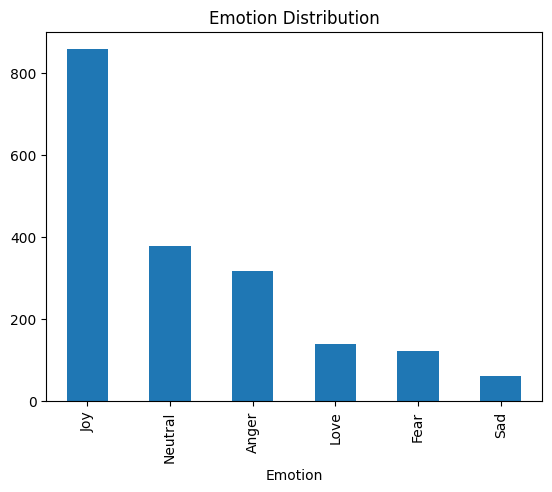

In [87]:
#visualisasikan value_counts dari emotion jadi graph
emotion_count.plot(kind='bar')
plt.title('Emotion Distribution')
plt.xlabel('Emotion')

In [88]:
jumlah_nan = merged_df.isna().sum()

print(jumlah_nan)

username     0
full_text    0
topic        0
emotion      0
dtype: int64


## Knowledge

### Per-Topic

In [89]:
topic_cluster_counts = merged_df['topic'].value_counts().reset_index()
topic_cluster_counts

,topic,count
0,3,351
1,0,335
2,1,292
3,2,264
4,4,243
5,5,157
6,7,84
7,8,76
8,9,54
9,6,24


<Axes: xlabel='emotion', ylabel='count'>

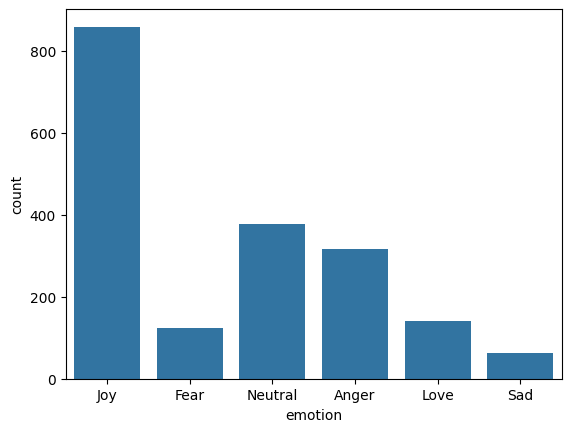

In [90]:
#tampilkan semua data tanpa melihat topic
sns.countplot(x='emotion', data=merged_df)

In [92]:
#berikan saya emosi paling banyak dari setiap topik
topik_dan_emosi = merged_df.groupby('topic')['emotion'].value_counts().groupby('topic').head(1)
topik_dan_emosi

topic  emotion
0      Joy        217
1      Joy        181
2      Joy        141
3      Anger      167
4      Love        75
5      Joy         83
6      Anger       12
7      Joy         39
8      Fear        29
9      Love        32
Name: count, dtype: int64

In [ ]:
topik_ke = 9

topic_cluster_0_df = merged_df[merged_df['topic'] == topik_ke]
topic_cluster_0_df = topic_cluster_0_df.sort_values(by='emotion', ascending=True)

count_emotion = topic_cluster_0_df['emotion'].value_counts().reset_index()
count_emotion

,emotion,count
0,Love,32
1,Anger,9
2,Joy,5
3,Neutral,4
4,Fear,2
5,Sad,2


<Axes: xlabel='emotion', ylabel='count'>

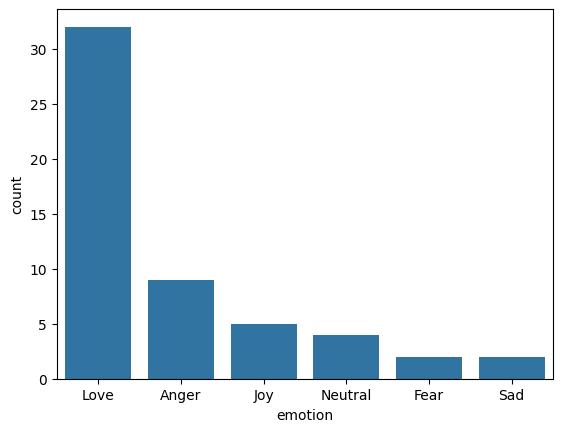

In [ ]:
sns.barplot(x='emotion', y='count', data=count_emotion)


In [ ]:
topic_cluster_0_df = topic_cluster_0_df.sort_values(by='emotion', ascending=False)


#tampilkan semuanya di output jangan dibatasi
pd.set_option('display.max_rows', None)
topic_cluster_0_df.head(10)


,username,full_text,topic,emotion
1672,cingreborn,Kerasa sakitnya sampai disini prof haye ️ #timnasday https://t.co/kG918SdSY3,9,Sad
252,tonokr8s,@reenriinn @YOiuoooop @hheeyheey @idextratime kalo dia ga loyal bela timnas indo dia pasti gamau berjuang dari awal siapa pemain keturunan yang ikut berjuang dari rank 180an? dia juga pasti bela thailand secara waktu itu timnas indo sangat tertinggal jauh dari thai,9,Sad
1872,YaaNft,Mas calvin verdok apa mas carvajal bjir menolak penyesuaian main paling santuy tapi tajam #TimnasDay,9,Neutral
1490,UmarrrYoo,harus rombak besar-besaran nih kejagung #timah #babel #kejagungarogan #kejagungoverbody #savebabel #timnasday #300t #ekonomibabel #tni #BUMN #Baktiuntuknegeri #kejagungri https://t.co/pCGRxxsazu,9,Neutral
1628,ayinsshit,AI LAFYU RIZKI RIDHOO sederhana tapi Rizky Billar cemburu cr on vid #rizkybillar #ridho #lesti #timnasday https://t.co/N6kN2XjEnF,9,Neutral
1472,akabarfaisall,Info slot gacor hari ini Slot server thailand Garansi kekalahan 100% Situs deposit 10k Event scatter hitam LINK GACOR : https://t.co/DjDQZ0M9Q9 Towel Adrian Jay Idzes Nathan Syifa Verdonk Thailand #TimnasDay FIFA #SLOTPGWALLET #slottergacor #situsgacor https://t.co/rhnhO9RjpB,9,Neutral
416,okezonenews,Timnas Indonesia Hantam Filipina 2-0 Shin Tae-yong Puas dengan Debut Calvin Verdonk https://t.co/Is41EPg8P0,9,Love
226,GOAL_ID,Seharusnya bisa menang 5-0. Calvin Verdonk senang bisa melakoni debutnya bersama Timnas Indonesia dengan kemenangan atas Filipina. #TimnasDay #TimnasIndonesia #WCQ2026 #Filipina https://t.co/YVkusBxeTG,9,Love
47,_the_blue_sea_,@Xenoverse98 @idextratime @bliblidotcom Timnas pusat: Bang Jago Belanda Timnas cabang: Kak Indo oke gas Timnas ranting: Dik Suriname cah bagos,9,Love
41,akankulepas,@muhfirda__ @idextratime @erickthohir Ian Maatsen bukannya dipanggil timnas Belanda ya? Gara gara De Jong dicoret,9,Love


In [ ]:
#ukuran kolom jangan dibatasi untuk full_text
pd.set_option('display.max_colwidth', None)

#tampilkan hanya emosi anger
topic_cluster_0_df[topic_cluster_0_df['emotion'] == 'Anger'].head(10)

,username,full_text,topic,emotion
484,pn7l7h,Broo cepetan sidang CASnya agar segera gabung timnas klo masih dperlambat bilang aja temennya mas @gibran_tweet anak Presiden RI siapa tau bisa di urus lbh cepet. Sept sebentar lagi bro klo g pke jasa calo aja bro,9,Anger
1036,vickotwitt,@mynameisrichie_ @MDeva909 @DelanRamadoni22 @gilabola_ina yg FAKTA aja sekarang mereka gabung di Indonesia kaya haye usia udah 29 tahun timnas mana lagi yang mau nerima dia..tolol,9,Anger
756,raihansn_,Padahal sederhana. Pemain diaspora bisa bagus itu hasil kerja KNVB. Mereka pemain diaspora bisa memutuskan gabung timnas itu berkat nama besar ET yang periodik sebagai ketum (dan mungkin punya ambisi lain). PSSI sebagai federasi ya sama aja tetap busuk.,9,Anger
1041,vickotwitt,@Drunkenmaster29 @idextratime @bliblidotcom yoi lama2 timnas Indonesia isinya pemain instan modal keturunan sm nyanyi Indonesia raya doang,9,Anger
996,mynameisrichie_,@vickotwitt @MDeva909 @DelanRamadoni22 @gilabola_ina Msh aja kotak kotakin pemain naturalisasi &amp; lokal. Toh mereka punya drh Indo dari keluarga. Bahkan rata-rata keluarga besar mrk masih tinggal Indonesia. Terserah Anda ga suka hak Anda balik aja sendiri ke jaman kegelapan Timnas. Gua sebagai anak La grande dukung yg skrng,9,Anger
1327,Starrlghttt,@apa_ini89730 @TimnasIndonesia dasar wibu bau bawang,9,Anger
1493,walawe77577266,kaya gak ada orang pinter lainnya aja di negeri ini #timah #babel #kejagungarogan #kejagungoverbody #savebabel #timnasday #300t #ekonomibabel #tni #BUMN #Baktiuntuknegeri #kejagungri https://t.co/Aasui8UbYZ,9,Anger
1489,UmarrrYoo,gimana indonesia mau maju kalau pejabatnya begini #timah #babel #kejagungarogan #kejagungoverbody #savebabel #timnasday #300t #ekonomibabel #tni #BUMN #Baktiuntuknegeri #kejagungri https://t.co/AfM3wxpwa6,9,Anger
12,Aryapratam19,@Iyangaprill Lawak emng org bandung ajg ni kontol lu semua pendukung Persib ajg ini timnas bung bukan dukung antar club gosa merasa klub lu hebat dari timnas jijik gua lihat komen penduduk Persib ni tolol,9,Anger


# Konten Tentang Timnas Indonesia di Vidio

## 1. Dukungan Penggemar untuk Timnas Indonesia (Joy)
**Konten Senang**: Video yang menyoroti dukungan penuh dari para penggemar untuk Timnas Indonesia, termasuk ucapan selamat dan sorak-sorai setelah kemenangan dalam berbagai pertandingan.

**Contoh Tweet**:
> Dukungan luar biasa dari penggemar untuk Timnas Indonesia! 🎉 Saksikan momen-momen kegembiraan dan ucapan selamat untuk para pemain. #DukungTimnas [link video]

## 2. Perjalanan Timnas Indonesia di Babak Kualifikasi Piala Dunia dan Piala Asia (Joy)
**Konten Senang**: Video rekapitulasi perjalanan Timnas Indonesia di babak kualifikasi, termasuk momen-momen penting dan wawancara dengan pemain serta pelatih.

**Contoh Tweet**:
> Timnas Indonesia tampil impresif di kualifikasi Piala Dunia dan Piala Asia! 🎉 Saksikan rekap perjalanan mereka dan wawancara eksklusif. #TimnasKualifikasi [link video]

## 3. Keberhasilan Timnas Indonesia Lolos ke Putaran Ketiga Kualifikasi Piala Dunia 2026 (Joy)
**Konten Senang**: Cuplikan video dari momen-momen gol dan selebrasi pemain serta fans. Kutipan inspiratif dari pelatih dan pemain tentang perjalanan mereka menuju kualifikasi.

**Contoh Tweet**:
> Timnas Indonesia lolos ke putaran ketiga kualifikasi Piala Dunia 2026! 🎊 Saksikan momen-momen terbaik dan kegembiraan para pemain dan fans! #TimnasLolos [link video]

## 4. Penampilan Anang Menyanyikan "Indonesia Pusaka" Sebelum Pertandingan (Anger)
**Konten Marah**: Video atau artikel yang membahas reaksi emosional penggemar terhadap penampilan Anang menyanyikan "Indonesia Pusaka" sebelum pertandingan, dengan fokus pada kontroversi dan pendapat yang beragam.

**Contoh Tweet**:
> Penampilan Anang menyanyikan "Indonesia Pusaka" sebelum pertandingan menimbulkan berbagai reaksi. Apa pendapat kalian? #IndonesiaPusaka [link video]

## 5. Performa Thom Haye dan Verdonk di lapangan saat bersama timnas(Love)
**Konten Cinta**: Video reaksi penggemar yang menunjukkan dukungan dan kasih sayang mereka kepada pemain seperti Verdonk dan Haye. Testimoni dari fans tentang kecintaan mereka pada pemain dan tim.

**Contoh Tweet**:
> Dukungan luar biasa dari penggemar untuk Verdonk dan Haye! ❤️ Saksikan reaksi dan testimoni mereka tentang kecintaan pada Timnas Indonesia. #LoveForTimnas [link video]

## 6. Momen Bersejarah dan Gol Penting Timnas Indonesia (Joy)
**Konten Senang**: Cuplikan video dari momen-momen bersejarah dan gol-gol penting yang dicetak oleh Timnas Indonesia dalam babak kualifikasi dan turnamen AFF.

**Contoh Tweet**:
> Gol-gol bersejarah dari Timnas Indonesia di babak kualifikasi dan turnamen AFF! 🎊 Saksikan momen-momen terbaik di sini. #TimnasGol [link video]

## 7. Kondisi Rumput di Stadion Gelora Bung Karno Setelah Konser (Fear)
**Konten Takut**: Video yang menunjukkan kondisi rumput di Stadion Gelora Bung Karno setelah konser, dengan sorotan pada keluhan penggemar mengenai dampaknya pada performa timnas Indonesia di lapangan.

**Contoh Tweet**:
> Lihat kondisi rumput Stadion Gelora Bung Karno setelah konser dan bagaimana ini memengaruhi performa timnas Indonesia. #GBKRumput [link video]

## 8. Diskusi Strategi Pelatih Shin Tae-yong dan Potensi Pemain Diaspora (Joy)
**Konten Senang**: Video yang menyoroti strategi pelatih Shin Tae-yong dan performa pemain seperti Ernando dan Verdonk, termasuk diskusi tentang potensi pemain diaspora untuk memperkuat timnas.

**Contoh Tweet**:
> Lihat bagaimana strategi Shin Tae-yong membawa Timnas Indonesia ke puncak! 🎉 Diskusi tentang pemain diaspora dan potensi mereka di sini. 💪🇮🇩 [link video]

## 9. Kondisi Lapangan dan Performa Pemain di Berbagai Pertandingan (Fear)
**Konten Takut**: Video yang menunjukkan kondisi lapangan yang kurang baik dan dampaknya pada performa pemain Timnas Indonesia di berbagai pertandingan.

**Contoh Tweet**:
> Kondisi lapangan yang kurang baik memengaruhi performa pemain Timnas Indonesia. Lihat bagaimana ini berdampak pada pertandingan. #KondisiLapangan [link video]

## 10. Pengalaman Penggemar Menonton Pertandingan Timnas Indonesia (Fear)
**Konten Takut**: Video yang menunjukkan pengalaman penggemar saat menonton pertandingan timnas, dengan fokus pada momen-momen penting dan rasa takut akan ketinggalan (FOMO).

**Contoh Tweet**:
> Banyak yang merasa FOMO karena tidak bisa menonton langsung Timnas. 😢 Simak cerita mereka dan dukung Timnas dari rumah! #FOMOTimnas [link video]